In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import steam
from jax import grad, jit, jvp, vmap
import jax.numpy as np
import matplotlib
import matplotlib.pyplot as plt
from functools import partial

matplotlib.rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (20, 10)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rho = np.linspace(1, 1000, num=1000)

/Users/danielsuo/miniconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
f = steam.f(rho, 373)

Text(0, 0.5, '$f(\\rho, T)$')

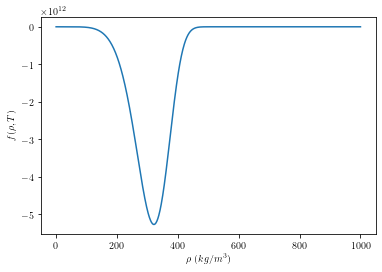

In [4]:
plt.plot(rho, f)
plt.xlabel(r"$\rho\ (kg / m^3)$")
plt.ylabel(r"$f(\rho, T)$")

In [5]:
f = steam.f(rho, 273)

Text(0, 0.5, '$f(\\rho, T)$')

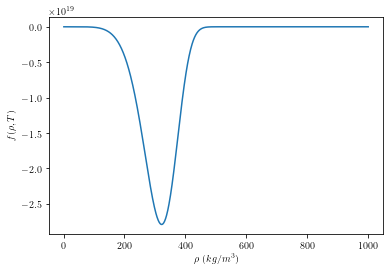

In [6]:
plt.plot(rho, f)
plt.xlabel(r"$\rho\ (kg / m^3)$")
plt.ylabel(r"$f(\rho, T)$")

In [7]:
def f_parts(rho, T):
    delta = rho / steam.rho_c
    tau = steam.T_c / T
    print(steam.R, T, steam.phi_o(delta, tau), steam.phi_r(delta, tau), steam.f(rho, T))

In [8]:
f_parts(838.025, 500)

0.46151805 500 2.047978 -3.4269326 -318.2062


In [9]:
def partial_delta(func):
    return lambda delta, tau: jvp(partial(func, tau), (delta,) , (eye[0],) )[1]

def partial_tau(func):
    return lambda delta, tau: jvp(partial(func, delta), (tau,) , (eye[0],) )[1]

eye = np.eye(1)

dphi0_ddelta = lambda delta, tau: jvp(partial(steam.phi_o, tau), (delta,) , (eye[0],) )[1]

DeviceArray(9.046111, dtype=float32)

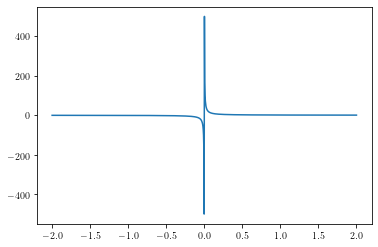

In [10]:
x = np.linspace(-2.0, 2.0, num=1000)
plt.plot(x, vmap(grad(steam.phi_o, 0), (0, None), 1)(x, 0))
grad(steam.phi_o, 1)(838.025 / steam.rho_c, steam.T_c / 500)

In [11]:
def f(x, y):
    return 2*x + y

In [12]:
grad(f, 1)(1.0, 100.0)

array(1., dtype=float32)

In [13]:
print(grad(steam.phi_o, 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_o, 0), 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(steam.phi_o, 1)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_o, 1), 1)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_o, 1), 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_o, 0), 1)(838.025 / steam.rho_c, steam.T_c / 500))

print(grad(steam.phi_r, 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_r, 0), 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(steam.phi_r, 1)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_r, 1), 1)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_r, 1), 0)(838.025 / steam.rho_c, steam.T_c / 500))
print(grad(grad(steam.phi_r, 0), 1)(838.025 / steam.rho_c, steam.T_c / 500))

0.38423672
-0.14763787
9.046111
-1.9324919
0.0
0.0
-0.36436608
0.8560681
-5.814035
-2.234405
-1.1217631
-1.1217638


In [19]:
steam.p(838.025 / steam.rho_c, steam.T_c / 500)

DeviceArray(10000.664, dtype=float32)

In [20]:
steam.p(996.556 / steam.rho_c, steam.T_c / 300)

DeviceArray(97.67017, dtype=float32)